In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
full = pd.read_csv(r'./full_database.csv')
full.head(2)

,Cliente,Projeto,Nome_Colaborador,Tipo_Apontamento,Workday,Horas,Origem
0,TELEFONICA DATA S.A.,Telefonica,Abner Alvarenga Rueda,Horas Extras,2018-12-03,0.13,Apontamento_de_Horas_Dezembro.xlsm
1,TELEFONICA DATA S.A.,Telefonica,Abner Alvarenga Rueda,Horas Extras,2018-12-04,0.71,Apontamento_de_Horas_Dezembro.xlsm


In [3]:
recursos = pd.read_csv(r'C:\Users\Dell\Documents\Luana\Digital_House\Projeto_Integrador\metadata\CSVs_Processados\recursos.csv')
recursos.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
execs = pd.read_csv(r'C:\Users\Dell\Documents\Luana\Digital_House\Projeto_Integrador\metadata\CSVs_Processados\execucoes.csv', parse_dates=['Data_Execucao',
                                                                                   'Data_FechamentoCenario',
                                                                                   'TimeStamp_Execucao'])
execs.drop('Unnamed: 0', axis = 1, inplace = True)

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,17,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
execs.shape

(136611, 32)

In [6]:
execs = execs[pd.notnull(execs['Data_Execucao'])]

In [7]:
#Filtrando testes executados a partir de 2018-12-01'
start_date = '2018-12-01'
execs = execs[execs['Data_Execucao'] >= start_date]

In [8]:
execs.head()

,Classificacao,Data_Execucao,Data_FechamentoCenario,Duracao_Segundos,Fase,Fechamento_CT,ID_RUN,Metodologia,Motivo_Execucao,Motivo_Faturamento,...,StausCT_Execucao,Staus_ConsolidadodoCN,Staus_Projeto,Test_Set,Testador_Real,Tipo_Execucao,TimeStamp_Execucao,ID_Execucao,ID_Funcionario,Target
0,Projeto,2019-02-07,2018-12-11,896.0,REG,2019-02-07 00:00:00,414059.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,NaN,NaN,NaN,CN0129 - Faturamento do ciclo de Billing,ft.techmahindra.rsampaio,RUN,2019-02-07 16:05:08,452013,101227,1.0
1,Projeto,2019-02-07,2018-12-11,145.0,REG,2019-02-07 00:00:00,414060.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,NaN,NaN,NaN,CN0129 - Faturamento do ciclo de Billing,ft.techmahindra.rsampaio,RUN,2019-02-07 16:14:00,340314,101227,1.0
2,Projeto,2019-02-07,2018-12-11,245.0,REG,2019-02-07 00:00:00,414061.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,NaN,NaN,NaN,CN0129 - Faturamento do ciclo de Billing,ft.techmahindra.rsampaio,RUN,2019-02-07 16:18:20,211342,101227,1.0
3,Projeto,2019-02-07,2018-12-11,90.0,REG,2019-02-07 00:00:00,414062.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,NaN,NaN,NaN,CN0129 - Faturamento do ciclo de Billing,ft.techmahindra.rsampaio,RUN,2019-02-07 16:20:04,224017,101227,1.0
4,Projeto,2019-02-07,2018-12-11,499.0,REG,2019-02-07 00:00:00,414063.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,NaN,NaN,NaN,CN0129 - Faturamento do ciclo de Billing,ft.techmahindra.rsampaio,RUN,2019-02-07 16:28:37,249924,101227,1.0


---

Criando Base com informações **testers x testes totais**

In [9]:
pivot_testes_por_tester = pd.pivot_table(execs, 
                                         values='ID_Execucao',
                                         columns=['Data_Execucao'],
                                         index = 'Testador_Real',
                                         aggfunc = 'count')
pivot_testes_por_tester.reset_index(inplace = True)

In [10]:
pivot_testes_por_tester.shape

(292, 138)

In [11]:
pivot_testes_por_tester.head()

Data_Execucao,Testador_Real,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00,2018-12-04 00:00:00,2018-12-05 00:00:00,2018-12-06 00:00:00,2018-12-07 00:00:00,2018-12-08 00:00:00,2018-12-09 00:00:00,...,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-20 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00
0,ft.techmahindra.aandrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ft.techmahindra.aarruda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,ft.techmahindra.abiondi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ft.techmahindra.abispo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ft.techmahindra.abrito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#criar coluna com contagem de dias trabalhados
pivot_testes_por_tester['contagem_testes_total'] = pivot_testes_por_tester.iloc[:,1:].count(axis=1)

In [13]:
#criar coluna com contagem de testes totais
pivot_testes_por_tester['soma_testes_total'] = pivot_testes_por_tester.iloc[:,1:-1].sum(axis=1) 

In [14]:
#criar coluna média de testes por dia
pivot_testes_por_tester['media_testes_total'] =  pivot_testes_por_tester['soma_testes_total']/pivot_testes_por_tester['contagem_testes_total']

In [15]:
#Base com informações totais acerca do teste na base total
base_testers = pivot_testes_por_tester[['Testador_Real',
                                        'contagem_testes_total',
                                        'soma_testes_total',
                                        'media_testes_total']].copy()

In [16]:
base_testers.rename({'Testador_Real':'testador_real'}, inplace = True, axis = 1)

In [17]:
base_testers.head()

Data_Execucao,testador_real,contagem_testes_total,soma_testes_total,media_testes_total
0,ft.techmahindra.aandrade,17,262.0,15.411765
1,ft.techmahindra.aarruda,14,284.0,20.285714
2,ft.techmahindra.abiondi,8,64.0,8.000000
3,ft.techmahindra.abispo,17,698.0,41.058824
4,ft.techmahindra.abrito,9,139.0,15.444444


In [18]:
#pivot apenas com testes billable
pivot_testes_por_tester_bill = pd.pivot_table(execs[execs['Target']==1], 
                                         values='ID_Execucao',
                                         columns=['Data_Execucao'],
                                         index = 'Testador_Real',
                                         aggfunc = 'count')
pivot_testes_por_tester_bill.reset_index(inplace = True)

In [19]:
pivot_testes_por_tester_bill['soma_testes_total_bill'] = pivot_testes_por_tester_bill.iloc[:,1:].sum(axis=1) 

In [20]:
#adicionando colunas com número total de testes billable
base_testers = pd.merge(left=base_testers,
                        right=pivot_testes_por_tester_bill[['Testador_Real','soma_testes_total_bill']],
                        left_on='testador_real',
                        right_on='Testador_Real',
                        how='left')

In [21]:
base_testers.drop('Testador_Real', axis=1, inplace = True)

In [22]:
base_testers.head()

Data_Execucao,testador_real,contagem_testes_total,soma_testes_total,media_testes_total,soma_testes_total_bill
0,ft.techmahindra.aandrade,17,262.0,15.411765,49.0
1,ft.techmahindra.aarruda,14,284.0,20.285714,3.0
2,ft.techmahindra.abiondi,8,64.0,8.000000,5.0
3,ft.techmahindra.abispo,17,698.0,41.058824,3.0
4,ft.techmahindra.abrito,9,139.0,15.444444,137.0


In [23]:
base_testers['%_testes_billable'] = base_testers['soma_testes_total_bill']/base_testers['soma_testes_total']

Média de testes billables: 0.3943801504065733
Desvpad de testes billables: 0.28454740268035994


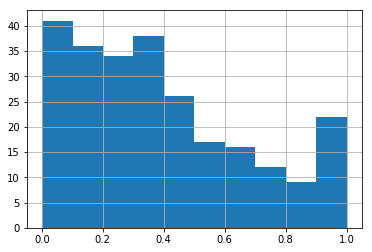

In [24]:
print('Média de testes billables: ' + str(base_testers['%_testes_billable'].mean()))
print('Desvpad de testes billables: ' + str(base_testers['%_testes_billable'].std()))
base_testers['%_testes_billable'].hist()

In [25]:
base_testers.head()

Data_Execucao,testador_real,contagem_testes_total,soma_testes_total,media_testes_total,soma_testes_total_bill,%_testes_billable
0,ft.techmahindra.aandrade,17,262.0,15.411765,49.0,0.187023
1,ft.techmahindra.aarruda,14,284.0,20.285714,3.0,0.010563
2,ft.techmahindra.abiondi,8,64.0,8.000000,5.0,0.078125
3,ft.techmahindra.abispo,17,698.0,41.058824,3.0,0.004298
4,ft.techmahindra.abrito,9,139.0,15.444444,137.0,0.985612


---

Criando Base com informações testers x testes **por mês**

In [26]:
execs['data_execuca_ano'] = pd.DatetimeIndex(execs['Data_Execucao']).year
execs['data_execuca_mes'] = pd.DatetimeIndex(execs['Data_Execucao']).month
execs['data_execuca_dia'] = pd.DatetimeIndex(execs['Data_Execucao']).day

In [27]:
execs = execs.astype({'data_execuca_ano': str,
                      'data_execuca_mes': str,
                      'data_execuca_dia': str})
execs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134011 entries, 0 to 136610
Data columns (total 35 columns):
Classificacao             134011 non-null object
Data_Execucao             134011 non-null datetime64[ns]
Data_FechamentoCenario    99674 non-null datetime64[ns]
Duracao_Segundos          134006 non-null float64
Fase                      134011 non-null object
Fechamento_CT             105957 non-null object
ID_RUN                    134011 non-null float64
Metodologia               134011 non-null object
Motivo_Execucao           62438 non-null object
Motivo_Faturamento        134011 non-null object
Origem                    134011 non-null object
Origem_Sheet              134011 non-null object
Primeira_Reexecucao       113854 non-null object
QC                        134011 non-null object
Qtde_StepsATTACHMENT      134011 non-null float64
Qtde_TotalSteps           134011 non-null float64
Regra                     13340 non-null object
Sistema_Principal         134011 non-nu

In [28]:
execs['data_execuca_anomes'] = execs['data_execuca_ano'] + execs['data_execuca_mes']

In [29]:
execs['data_execuca_anomesdia'] = execs['data_execuca_ano'] + execs['data_execuca_mes'] + execs['data_execuca_dia'] 

### 2. Cruzar a base de execução com turno

In [30]:
# Trazer o Turno do Colaborador
execs = pd.merge(execs,
                 recursos[['ALM_User','Turno']],
                 left_on='Testador_Real',
                 right_on='ALM_User',
                 how = 'left')
execs.head(2)

,Classificacao,Data_Execucao,Data_FechamentoCenario,Duracao_Segundos,Fase,Fechamento_CT,ID_RUN,Metodologia,Motivo_Execucao,Motivo_Faturamento,...,ID_Execucao,ID_Funcionario,Target,data_execuca_ano,data_execuca_mes,data_execuca_dia,data_execuca_anomes,data_execuca_anomesdia,ALM_User,Turno
0,Projeto,2019-02-07,2018-12-11,896.0,REG,2019-02-07 00:00:00,414059.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,452013,101227,1.0,2019,2,7,20192,201927,ft.techmahindra.rsampaio,T2
1,Projeto,2019-02-07,2018-12-11,145.0,REG,2019-02-07 00:00:00,414060.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,340314,101227,1.0,2019,2,7,20192,201927,ft.techmahindra.rsampaio,T2


In [31]:
# Converter date object para datetime
execs['TimeStamp_Execucao'] = pd.to_datetime(execs['TimeStamp_Execucao'], format = '%Y-%m-%d')

In [32]:
# Extrair hora do datetime da execução
execs['hora'] = execs.TimeStamp_Execucao.dt.time

Função para verificar se o teste foi executado nas **horas regulares ou nas horas extras**

In [33]:
import datetime

# Marca hora de inicio do turno
def turno_inic(t):
    if t == "T1":
        startTime = '9:00'
        endTime = '18:00'
        startTime= datetime.datetime.strptime(startTime, "%H:%M") 
        endTime= datetime.datetime.strptime(endTime, "%H:%M")
        return startTime
    
    elif t == "T2":
        startTime = '14:00'
        endTime = '22:00'
        startTime= datetime.datetime.strptime(startTime, "%H:%M") 
        endTime= datetime.datetime.strptime(endTime, "%H:%M")
        return startTime

# Marca hora de fim do turno
def turno_fim(t):
    if t == "T1":
        startTime = '9:00'
        endTime = '18:00'
        startTime= datetime.datetime.strptime(startTime, "%H:%M") 
        endTime= datetime.datetime.strptime(endTime, "%H:%M")
        return endTime
    elif t == "T2":
        startTime = '14:00'
        endTime = '22:00'
        startTime= datetime.datetime.strptime(startTime, "%H:%M") 
        endTime= datetime.datetime.strptime(endTime, "%H:%M")
        return endTime

# Classifica se teste foi realizado em hora regular ou extra
def teste_em_hora_regular(df):       
    if df['Inicio_turno'] < df['Fim_turno']:
        return df['hora'] >= df['Inicio_turno'] and df['hora'] <= df['Fim_turno']
    else:
        return df['hora'] >= df['Inicio_turno'] or df['hora'] <= df['Fim_turno']  

In [34]:
execs['Inicio_turno'] = execs['Turno'].apply([lambda x: turno_inic(x)])
execs['Fim_turno'] = execs['Turno'].apply([lambda x: turno_fim(x)])

execs['Inicio_turno']  = execs.Inicio_turno.dt.time
execs['Fim_turno']  = execs.Fim_turno.dt.time

In [35]:
execs['teste_hora_regular'] = execs.apply(teste_em_hora_regular, axis=1).astype(int)

In [74]:
execs.head()

,Classificacao,Data_Execucao,Data_FechamentoCenario,Duracao_Segundos,Fase,Fechamento_CT,ID_RUN,Metodologia,Motivo_Execucao,Motivo_Faturamento,...,data_execuca_mes,data_execuca_dia,data_execuca_anomes,data_execuca_anomesdia,ALM_User,Turno,hora,Inicio_turno,Fim_turno,teste_hora_regular
0,Projeto,2019-02-07,2018-12-11,896.0,REG,2019-02-07 00:00:00,414059.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,2,7,20192,201927,ft.techmahindra.rsampaio,T2,16:05:08,14:00:00,22:00:00,1
1,Projeto,2019-02-07,2018-12-11,145.0,REG,2019-02-07 00:00:00,414060.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,2,7,20192,201927,ft.techmahindra.rsampaio,T2,16:14:00,14:00:00,22:00:00,1
2,Projeto,2019-02-07,2018-12-11,245.0,REG,2019-02-07 00:00:00,414061.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,2,7,20192,201927,ft.techmahindra.rsampaio,T2,16:18:20,14:00:00,22:00:00,1
3,Projeto,2019-02-07,2018-12-11,90.0,REG,2019-02-07 00:00:00,414062.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,2,7,20192,201927,ft.techmahindra.rsampaio,T2,16:20:04,14:00:00,22:00:00,1
4,Projeto,2019-02-07,2018-12-11,499.0,REG,2019-02-07 00:00:00,414063.0,Agil,Regressao por Qualidade,TestSet Aprovado,...,2,7,20192,201927,ft.techmahindra.rsampaio,T2,16:28:37,14:00:00,22:00:00,1


### 3. Cria bases tester's visão anomes

In [36]:
#Testes por mês
teste_anomes = execs.groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_total_teste": 'count'}})
teste_anomes.columns = teste_anomes.columns.droplevel(0)
teste_anomes = teste_anomes.reset_index()
teste_anomes.head()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,data_execuca_anomes,Testador_Real,qtde_total_teste
0,201812,ft.techmahindra.aarruda,2
1,201812,ft.techmahindra.adoti,36
2,201812,ft.techmahindra.afcosta,1
3,201812,ft.techmahindra.afeitosa,117
4,201812,ft.techmahindra.afernandes,8


In [37]:
# Dias de Teste por Mês
dias_anomes = execs.groupby(['data_execuca_anomes','Testador_Real']).agg({'data_execuca_anomesdia': {"qtde_dias": pd.Series.nunique}})
dias_anomes.columns = dias_anomes.columns.droplevel(0)
dias_anomes = dias_anomes.reset_index()
dias_anomes.head()

,data_execuca_anomes,Testador_Real,qtde_dias
0,201812,ft.techmahindra.aarruda,1
1,201812,ft.techmahindra.adoti,7
2,201812,ft.techmahindra.afcosta,1
3,201812,ft.techmahindra.afeitosa,12
4,201812,ft.techmahindra.afernandes,2


In [38]:
# Teste Billable por Mês
teste_billable_anomes = execs[execs['Target']==1].groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_teste_billable": 'count'}})
teste_billable_anomes.columns = teste_billable_anomes.columns.droplevel(0)
teste_billable_anomes = teste_billable_anomes.reset_index()
teste_billable_anomes.head()

,data_execuca_anomes,Testador_Real,qtde_teste_billable
0,201812,ft.techmahindra.adoti,1
1,201812,ft.techmahindra.afeitosa,46
2,201812,ft.techmahindra.afjunior,21
3,201812,ft.techmahindra.akumar,9
4,201812,ft.techmahindra.apenteado,3


In [39]:
# Teste Não Billable por Mês
teste_nao_billable_anomes = execs[execs['Target']!=1].groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_teste_nao_billable": 'count'}})
teste_nao_billable_anomes.columns = teste_nao_billable_anomes.columns.droplevel(0)
teste_nao_billable_anomes = teste_nao_billable_anomes.reset_index()
teste_nao_billable_anomes.head()

,data_execuca_anomes,Testador_Real,qtde_teste_nao_billable
0,201812,ft.techmahindra.aarruda,2
1,201812,ft.techmahindra.adoti,35
2,201812,ft.techmahindra.afcosta,1
3,201812,ft.techmahindra.afeitosa,71
4,201812,ft.techmahindra.afernandes,8


In [40]:
# Teste hora regular por Mês
teste_h_regular = execs[execs['teste_hora_regular']==1].groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_teste_h_regular": 'count'}})
teste_h_regular.columns = teste_h_regular.columns.droplevel(0)
teste_h_regular = teste_h_regular.reset_index()
teste_h_regular.head()

,data_execuca_anomes,Testador_Real,qtde_teste_h_regular
0,201812,ft.techmahindra.aarruda,2
1,201812,ft.techmahindra.adoti,36
2,201812,ft.techmahindra.afcosta,1
3,201812,ft.techmahindra.afeitosa,111
4,201812,ft.techmahindra.afernandes,8


In [41]:
# Teste HE por Mês
teste_h_extra = execs[execs['teste_hora_regular']!=1].groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_teste_h_extra": 'count'}})
teste_h_extra.columns = teste_h_extra.columns.droplevel(0)
teste_h_extra = teste_h_extra.reset_index()
teste_h_extra.head()

,data_execuca_anomes,Testador_Real,qtde_teste_h_extra
0,201812,ft.techmahindra.afeitosa,6
1,201812,ft.techmahindra.afjunior,27
2,201812,ft.techmahindra.ajesus,24
3,201812,ft.techmahindra.aoliveira,18
4,201812,ft.techmahindra.apassos,8


In [42]:
# Tempo gasto nos Testes - Filtro somente testes com informação da duração
teste_tempo_total = execs[execs['Duracao_Segundos']>0].groupby(['data_execuca_anomes','Testador_Real']).agg({'Duracao_Segundos': {"tempo_total_teste": 'sum'}})
teste_tempo_total.columns = teste_tempo_total.columns.droplevel(0)
teste_tempo_total = teste_tempo_total.reset_index()
teste_tempo_total.head()

,data_execuca_anomes,Testador_Real,tempo_total_teste
0,201812,ft.techmahindra.aarruda,34.0
1,201812,ft.techmahindra.adoti,11040.0
2,201812,ft.techmahindra.afcosta,669.0
3,201812,ft.techmahindra.afeitosa,55221.0
4,201812,ft.techmahindra.afernandes,326.0


In [43]:
# Quantidade de testes com tempo zerado
teste_tempo_zero = execs[execs['Duracao_Segundos']==0].groupby(['data_execuca_anomes','Testador_Real']).agg({'ID_Execucao': {"qtde_teste_tempo_zero": 'count'}})
teste_tempo_zero.columns = teste_tempo_zero.columns.droplevel(0)
teste_tempo_zero = teste_tempo_zero.reset_index()
teste_tempo_zero.head()

,data_execuca_anomes,Testador_Real,qtde_teste_tempo_zero
0,201812,ft.techmahindra.adoti,27
1,201812,ft.techmahindra.afeitosa,45
2,201812,ft.techmahindra.afernandes,5
3,201812,ft.techmahindra.afjunior,60
4,201812,ft.techmahindra.agasparini,28


In [44]:
# Consolida base visão tester
testers_anomes_consolidada = pd.merge(teste_anomes,
                                      dias_anomes[['Testador_Real','data_execuca_anomes','qtde_dias']],
                                      on=['Testador_Real', 'data_execuca_anomes'],
                                      how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                      teste_billable_anomes[['Testador_Real','data_execuca_anomes','qtde_teste_billable']],
                                      on=['Testador_Real', 'data_execuca_anomes'],
                                      how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                      teste_nao_billable_anomes[['Testador_Real','data_execuca_anomes','qtde_teste_nao_billable']],
                                      on=['Testador_Real', 'data_execuca_anomes'],
                                      how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                      teste_h_regular[['Testador_Real','data_execuca_anomes','qtde_teste_h_regular']],
                                      on=['Testador_Real', 'data_execuca_anomes'],
                                      how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                       teste_h_extra[['Testador_Real','data_execuca_anomes','qtde_teste_h_extra']],
                                       on=['Testador_Real', 'data_execuca_anomes'],
                                       how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                       teste_tempo_total[['Testador_Real','data_execuca_anomes','tempo_total_teste']],
                                       on=['Testador_Real', 'data_execuca_anomes'],
                                       how = 'left')

testers_anomes_consolidada = pd.merge(testers_anomes_consolidada,
                                       teste_tempo_zero[['Testador_Real','data_execuca_anomes','qtde_teste_tempo_zero']],
                                       on=['Testador_Real', 'data_execuca_anomes'],
                                       how = 'left')

testers_anomes_consolidada.shape

(1090, 10)

In [45]:
testers_anomes_consolidada.head(30)

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero
0,201812,ft.techmahindra.aarruda,2,1,NaN,2.0,2.0,NaN,34.0,NaN
1,201812,ft.techmahindra.adoti,36,7,1.0,35.0,36.0,NaN,11040.0,27.0
2,201812,ft.techmahindra.afcosta,1,1,NaN,1.0,1.0,NaN,669.0,NaN
3,201812,ft.techmahindra.afeitosa,117,12,46.0,71.0,111.0,6.0,55221.0,45.0
4,201812,ft.techmahindra.afernandes,8,2,NaN,8.0,8.0,NaN,326.0,5.0
5,201812,ft.techmahindra.afjunior,88,7,21.0,67.0,61.0,27.0,12223.0,60.0
6,201812,ft.techmahindra.agasparini,28,3,NaN,28.0,28.0,NaN,NaN,28.0
7,201812,ft.techmahindra.ajesus,57,7,NaN,57.0,33.0,24.0,39987.0,16.0
8,201812,ft.techmahindra.aklas,7,2,NaN,7.0,7.0,NaN,851.0,5.0
9,201812,ft.techmahindra.akumar,10,2,9.0,1.0,10.0,NaN,10608.0,NaN


In [46]:
testers_anomes_consolidada = testers_anomes_consolidada.fillna(0)

In [47]:
testers_anomes_consolidada.head()

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero
0,201812,ft.techmahindra.aarruda,2,1,0.0,2.0,2.0,0.0,34.0,0.0
1,201812,ft.techmahindra.adoti,36,7,1.0,35.0,36.0,0.0,11040.0,27.0
2,201812,ft.techmahindra.afcosta,1,1,0.0,1.0,1.0,0.0,669.0,0.0
3,201812,ft.techmahindra.afeitosa,117,12,46.0,71.0,111.0,6.0,55221.0,45.0
4,201812,ft.techmahindra.afernandes,8,2,0.0,8.0,8.0,0.0,326.0,5.0


Criando **Variáveis Relativas**

In [48]:
testers_anomes_consolidada['qtde_testes_por_dia'] = testers_anomes_consolidada['qtde_total_teste']/testers_anomes_consolidada['qtde_dias']
testers_anomes_consolidada['perc_teste_billable'] = testers_anomes_consolidada['qtde_teste_billable']/testers_anomes_consolidada['qtde_total_teste']
testers_anomes_consolidada['perc_teste_h_regular'] = testers_anomes_consolidada['qtde_teste_h_regular']/testers_anomes_consolidada['qtde_total_teste']
testers_anomes_consolidada['tempo_medio_teste_min'] = (testers_anomes_consolidada['tempo_total_teste']/testers_anomes_consolidada['qtde_total_teste'])/60
testers_anomes_consolidada['perc_teste_tempo_zero'] = testers_anomes_consolidada['qtde_teste_tempo_zero']/(testers_anomes_consolidada['qtde_total_teste']+testers_anomes_consolidada['qtde_teste_tempo_zero'])

**Exemplo:** Filtro de um tester

In [77]:
filtro = testers_anomes_consolidada[testers_anomes_consolidada['Testador_Real']== "ft.techmahindra.aarruda"]

In [78]:
filtro.head()

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero,qtde_testes_por_dia,perc_teste_billable,perc_teste_h_regular,tempo_medio_teste_min,perc_teste_tempo_zero
0,201812,ft.techmahindra.aarruda,2,1,0.0,2.0,2.0,0.0,34.0,0.0,2.000000,0.000000,1.000000,0.283333,0.000000
196,20191,ft.techmahindra.aarruda,77,4,1.0,76.0,75.0,2.0,4177.0,75.0,19.250000,0.012987,0.974026,0.904113,0.493421
427,20192,ft.techmahindra.aarruda,146,4,0.0,146.0,127.0,19.0,0.0,146.0,36.500000,0.000000,0.869863,0.000000,0.500000
648,20193,ft.techmahindra.aarruda,34,3,1.0,33.0,34.0,0.0,153.0,32.0,11.333333,0.029412,1.000000,0.075000,0.484848
874,20194,ft.techmahindra.aarruda,25,2,1.0,24.0,25.0,0.0,11.0,24.0,12.500000,0.040000,1.000000,0.007333,0.489796


---

# Clusters Testers

In [51]:
clusters = pd.read_csv(r'.\clusters.csv')

In [52]:
clusters.head()

,Unnamed: 0,testador_real,cluster
0,0,ft.techmahindra.abrito,analistas_2
1,1,ft.techmahindra.adoti,analistas_3
2,2,ft.techmahindra.aoliveira,analistas_3
3,3,ft.techmahindra.arsouza,analistas_0
4,4,ft.techmahindra.arueda,analistas_3


In [53]:
clusters.cluster.unique()

array(['analistas_2', 'analistas_3', 'analistas_0', 'analistas_1',
       'assistentes_2', 'assistentes_0', 'assistentes_1',
       'lider_telefonica_1', 'lider_telefonica_2', 'lider_telefonica_0',
       'lider_teste_0', 'lider_teste_1', 'lider_teste_2', 'estimador',
       'coordenador', 'gerente', 'offshore', 'analista_automacao'],
      dtype=object)

In [54]:
 base_testers = pd.merge(left=testers_anomes_consolidada,
                         right=clusters[['testador_real','cluster']],
                         left_on='Testador_Real',
                         right_on='testador_real',
                         how='left')

In [55]:
base_testers.head()

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero,qtde_testes_por_dia,perc_teste_billable,perc_teste_h_regular,tempo_medio_teste_min,perc_teste_tempo_zero,testador_real,cluster
0,201812,ft.techmahindra.aarruda,2,1,0.0,2.0,2.0,0.0,34.0,0.0,2.000000,0.000000,1.000000,0.283333,0.000000,ft.techmahindra.aarruda,lider_telefonica_1
1,201812,ft.techmahindra.adoti,36,7,1.0,35.0,36.0,0.0,11040.0,27.0,5.142857,0.027778,1.000000,5.111111,0.428571,ft.techmahindra.adoti,analistas_3
2,201812,ft.techmahindra.afcosta,1,1,0.0,1.0,1.0,0.0,669.0,0.0,1.000000,0.000000,1.000000,11.150000,0.000000,NaN,NaN
3,201812,ft.techmahindra.afeitosa,117,12,46.0,71.0,111.0,6.0,55221.0,45.0,9.750000,0.393162,0.948718,7.866239,0.277778,ft.techmahindra.afeitosa,lider_telefonica_0
4,201812,ft.techmahindra.afernandes,8,2,0.0,8.0,8.0,0.0,326.0,5.0,4.000000,0.000000,1.000000,0.679167,0.384615,ft.techmahindra.afernandes,lider_teste_1


In [56]:
# Quantidade de clusters missing
filtro  = base_testers[base_testers['data_execuca_anomes'] == '20194']

print(filtro['cluster'].isnull().sum(axis = 0))
print(filtro.shape[0])
print("---"*10)
print("Percentual de Cluster Missing:")
print(filtro['cluster'].isnull().sum(axis = 0)/filtro.shape[0])

32
219
------------------------------
Percentual de Cluster Missing:
0.1461187214611872


Preenchendo os clusters missing por **Sem Info.**, para atribuir as métricas do cluster

In [57]:
base_testers['cluster']= base_testers['cluster'].fillna('sem_info')

### Métricas dos Clusters:

In [58]:
base_testers.head()

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero,qtde_testes_por_dia,perc_teste_billable,perc_teste_h_regular,tempo_medio_teste_min,perc_teste_tempo_zero,testador_real,cluster
0,201812,ft.techmahindra.aarruda,2,1,0.0,2.0,2.0,0.0,34.0,0.0,2.000000,0.000000,1.000000,0.283333,0.000000,ft.techmahindra.aarruda,lider_telefonica_1
1,201812,ft.techmahindra.adoti,36,7,1.0,35.0,36.0,0.0,11040.0,27.0,5.142857,0.027778,1.000000,5.111111,0.428571,ft.techmahindra.adoti,analistas_3
2,201812,ft.techmahindra.afcosta,1,1,0.0,1.0,1.0,0.0,669.0,0.0,1.000000,0.000000,1.000000,11.150000,0.000000,NaN,sem_info
3,201812,ft.techmahindra.afeitosa,117,12,46.0,71.0,111.0,6.0,55221.0,45.0,9.750000,0.393162,0.948718,7.866239,0.277778,ft.techmahindra.afeitosa,lider_telefonica_0
4,201812,ft.techmahindra.afernandes,8,2,0.0,8.0,8.0,0.0,326.0,5.0,4.000000,0.000000,1.000000,0.679167,0.384615,ft.techmahindra.afernandes,lider_teste_1


In [59]:
# Tempo gasto nos Testes - Filtro somente testes com informação da duração
base_clusters = base_testers.groupby(['data_execuca_anomes','cluster']).agg({'qtde_total_teste': {"qtde_total_teste": 'sum'},
                                                                             'qtde_dias': {"qtde_dias": 'sum'},
                                                                             'qtde_teste_billable': {"qtde_teste_billable": 'sum'},
                                                                             'qtde_teste_nao_billable': {"qtde_teste_nao_billable": 'sum'},
                                                                             'qtde_teste_h_regular': {"qtde_teste_h_regular": 'sum'},
                                                                             'qtde_teste_h_extra': {"qtde_teste_h_extra": 'sum'},
                                                                             'tempo_total_teste': {"tempo_total_teste": 'sum'},
                                                                             'qtde_teste_tempo_zero': {"qtde_teste_tempo_zero": 'sum'}})
base_clusters.columns = base_clusters.columns.droplevel(0)
base_clusters = base_clusters.reset_index()
base_clusters.head()

,data_execuca_anomes,cluster,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero
0,201812,analista_automacao,14,2,0.0,14.0,13.0,1.0,0.0,14.0
1,201812,analistas_1,648,42,174.0,474.0,357.0,291.0,95287.0,417.0
2,201812,analistas_2,940,72,235.0,705.0,796.0,144.0,136767.0,440.0
3,201812,analistas_3,2127,203,549.0,1578.0,1912.0,215.0,327624.0,1171.0
4,201812,assistentes_1,183,14,0.0,183.0,150.0,33.0,14401.0,95.0


In [60]:
base_clusters.cluster.unique()

array(['analista_automacao', 'analistas_1', 'analistas_2', 'analistas_3',
       'assistentes_1', 'assistentes_2', 'coordenador', 'gerente',
       'lider_telefonica_0', 'lider_telefonica_1', 'lider_telefonica_2',
       'lider_teste_0', 'lider_teste_1', 'lider_teste_2', 'sem_info',
       'offshore', 'analistas_0', 'assistentes_0', 'estimador'],
      dtype=object)

In [61]:
base_clusters['qtde_testes_por_dia'] = base_clusters['qtde_total_teste']/base_clusters['qtde_dias']
base_clusters['perc_teste_billable'] = base_clusters['qtde_teste_billable']/base_clusters['qtde_total_teste']
base_clusters['perc_teste_h_regular'] = base_clusters['qtde_teste_h_regular']/base_clusters['qtde_total_teste']
base_clusters['tempo_medio_teste_min'] = (base_clusters['tempo_total_teste']/base_clusters['qtde_total_teste'])/60
base_clusters['perc_teste_tempo_zero'] = base_clusters['qtde_teste_tempo_zero']/(base_clusters['qtde_total_teste']+base_clusters['qtde_teste_tempo_zero'])

In [62]:
base_clusters.head(14)

,data_execuca_anomes,cluster,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero,qtde_testes_por_dia,perc_teste_billable,perc_teste_h_regular,tempo_medio_teste_min,perc_teste_tempo_zero
0,201812,analista_automacao,14,2,0.0,14.0,13.0,1.0,0.0,14.0,7.000000,0.000000,0.928571,0.000000,0.500000
1,201812,analistas_1,648,42,174.0,474.0,357.0,291.0,95287.0,417.0,15.428571,0.268519,0.550926,2.450797,0.391549
2,201812,analistas_2,940,72,235.0,705.0,796.0,144.0,136767.0,440.0,13.055556,0.250000,0.846809,2.424947,0.318841
3,201812,analistas_3,2127,203,549.0,1578.0,1912.0,215.0,327624.0,1171.0,10.477833,0.258110,0.898919,2.567184,0.355064
4,201812,assistentes_1,183,14,0.0,183.0,150.0,33.0,14401.0,95.0,13.071429,0.000000,0.819672,1.311566,0.341727
5,201812,assistentes_2,2641,190,107.0,2534.0,2185.0,456.0,489280.0,2047.0,13.900000,0.040515,0.827338,3.087719,0.436647
6,201812,coordenador,91,7,0.0,91.0,12.0,79.0,0.0,91.0,13.000000,0.000000,0.131868,0.000000,0.500000
7,201812,gerente,2,1,0.0,2.0,2.0,0.0,0.0,2.0,2.000000,0.000000,1.000000,0.000000,0.500000
8,201812,lider_telefonica_0,835,37,65.0,770.0,739.0,96.0,60016.0,733.0,22.567568,0.077844,0.885030,1.197924,0.467474
9,201812,lider_telefonica_1,2,1,0.0,2.0,2.0,0.0,34.0,0.0,2.000000,0.000000,1.000000,0.283333,0.000000


In [63]:
testers_anomes_bench= pd.merge(left=base_testers,
                               right=base_clusters[['cluster','data_execuca_anomes','qtde_testes_por_dia', 'perc_teste_billable', 'perc_teste_h_regular', 'tempo_medio_teste_min','perc_teste_tempo_zero']],
                               left_on=['cluster', 'data_execuca_anomes'],
                               right_on=['cluster', 'data_execuca_anomes'],
                               how='left',
                               suffixes=('_tester', '_cluster'))

In [64]:
testers_anomes_bench.head()

,data_execuca_anomes,Testador_Real,qtde_total_teste,qtde_dias,qtde_teste_billable,qtde_teste_nao_billable,qtde_teste_h_regular,qtde_teste_h_extra,tempo_total_teste,qtde_teste_tempo_zero,...,perc_teste_h_regular_tester,tempo_medio_teste_min_tester,perc_teste_tempo_zero_tester,testador_real,cluster,qtde_testes_por_dia_cluster,perc_teste_billable_cluster,perc_teste_h_regular_cluster,tempo_medio_teste_min_cluster,perc_teste_tempo_zero_cluster
0,201812,ft.techmahindra.aarruda,2,1,0.0,2.0,2.0,0.0,34.0,0.0,...,1.000000,0.283333,0.000000,ft.techmahindra.aarruda,lider_telefonica_1,2.000000,0.000000,1.000000,0.283333,0.000000
1,201812,ft.techmahindra.adoti,36,7,1.0,35.0,36.0,0.0,11040.0,27.0,...,1.000000,5.111111,0.428571,ft.techmahindra.adoti,analistas_3,10.477833,0.258110,0.898919,2.567184,0.355064
2,201812,ft.techmahindra.afcosta,1,1,0.0,1.0,1.0,0.0,669.0,0.0,...,1.000000,11.150000,0.000000,NaN,sem_info,14.207965,0.127063,0.812519,2.205434,0.423933
3,201812,ft.techmahindra.afeitosa,117,12,46.0,71.0,111.0,6.0,55221.0,45.0,...,0.948718,7.866239,0.277778,ft.techmahindra.afeitosa,lider_telefonica_0,22.567568,0.077844,0.885030,1.197924,0.467474
4,201812,ft.techmahindra.afernandes,8,2,0.0,8.0,8.0,0.0,326.0,5.0,...,1.000000,0.679167,0.384615,ft.techmahindra.afernandes,lider_teste_1,4.857143,0.088235,1.000000,1.906863,0.403509


184.0

In [79]:
testers_anomes_bench.shape

(1096, 22)

In [65]:
list(testers_anomes_bench.columns)

['data_execuca_anomes',
 'Testador_Real',
 'qtde_total_teste',
 'qtde_dias',
 'qtde_teste_billable',
 'qtde_teste_nao_billable',
 'qtde_teste_h_regular',
 'qtde_teste_h_extra',
 'tempo_total_teste',
 'qtde_teste_tempo_zero',
 'qtde_testes_por_dia_tester',
 'perc_teste_billable_tester',
 'perc_teste_h_regular_tester',
 'tempo_medio_teste_min_tester',
 'perc_teste_tempo_zero_tester',
 'testador_real',
 'cluster',
 'qtde_testes_por_dia_cluster',
 'perc_teste_billable_cluster',
 'perc_teste_h_regular_cluster',
 'tempo_medio_teste_min_cluster',
 'perc_teste_tempo_zero_cluster']

In [66]:
filtro = testers_anomes_bench[testers_anomes_bench['Testador_Real'] == "ft.techmahindra.aoliveira"][['Testador_Real',
                                                                                                 'data_execuca_anomes',
                                                                                                 'cluster',
                                                                                                 'qtde_testes_por_dia_tester',
                                                                                                 'perc_teste_billable_tester',
                                                                                                 'perc_teste_h_regular_tester',
                                                                                                 'tempo_medio_teste_min_tester',
                                                                                                 'perc_teste_tempo_zero_tester',                                                                                     
                                                                                                 'qtde_testes_por_dia_cluster',
                                                                                                 'perc_teste_billable_cluster',
                                                                                                 'perc_teste_h_regular_cluster',
                                                                                                 'tempo_medio_teste_min_cluster',
                                                                                                 'perc_teste_tempo_zero_cluster']]

In [67]:
filtro

,Testador_Real,data_execuca_anomes,cluster,qtde_testes_por_dia_tester,perc_teste_billable_tester,perc_teste_h_regular_tester,tempo_medio_teste_min_tester,perc_teste_tempo_zero_tester,qtde_testes_por_dia_cluster,perc_teste_billable_cluster,perc_teste_h_regular_cluster,tempo_medio_teste_min_cluster,perc_teste_tempo_zero_cluster
10,ft.techmahindra.aoliveira,201812,analistas_3,18.000000,0.000000,0.000000,0.000000,0.500000,10.477833,0.258110,0.898919,2.567184,0.355064
208,ft.techmahindra.aoliveira,20191,analistas_3,38.916667,0.295503,0.967880,0.667380,0.409608,16.187755,0.252774,0.889687,3.301406,0.346999
442,ft.techmahindra.aoliveira,20192,analistas_3,17.222222,0.090323,0.987097,1.183333,0.419476,19.944330,0.295358,0.897550,3.214394,0.345623
660,ft.techmahindra.aoliveira,20193,analistas_3,17.400000,0.218391,0.977011,1.190805,0.121212,17.506112,0.340084,0.879749,3.266948,0.350036
888,ft.techmahindra.aoliveira,20194,analistas_3,29.272727,0.254658,0.860248,0.464441,0.400372,13.513011,0.633150,0.828611,3.342652,0.204856


Exportar CSV adequado para subir no **PowerBI**

In [68]:
testers_anomes_bench.to_csv(r'C:\Users\Dell\Documents\Luana\Digital_House\Projeto_Integrador\testers_anomes_bench.csv',sep=',',decimal=',')

In [69]:
base_clusters.to_csv(r'C:\Users\Dell\Documents\Luana\Digital_House\Projeto_Integrador\base_clusters.csv',sep=',',decimal=',')

In [70]:
import numpy as np

from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import BoxAnnotation, HoverTool

# Filtrando somente 1 mes de teste
testes_ = testers_anomes_bench[testers_anomes_bench['data_execuca_anomes'] == "20194"]


source = ColumnDataSource(testes_)

lista_testers = source.data['Testador_Real'].tolist()


x = testes_['qtde_testes_por_dia_tester']
y = testes_['perc_teste_billable_cluster']
radii = testes_['perc_teste_h_regular_tester']

colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(plot_width=100, plot_height=50)


p = figure(tools=TOOLS,
          title = "Quantidade testes vs. % Testes Billable",
          plot_width = 800,
          plot_height = 600,
          x_axis_label = "Quantidade Testes por Dia",
          y_axis_label = "% Testes Billable",
           
          )

p.scatter(x,
          y,
          radius=radii,
          fill_color=colors, 
          fill_alpha=0.6,
          line_color=None)

p.line([15,15,15,15,15], [0, 0.1, 0.5, 0.8, 1], line_width=2)
p.line([0, 1, 15, 30, 100], [0.5,0.5,0.5,0.5,0.5], line_width=2)


low_box_l = BoxAnnotation(top=0.5,left=0,right = 15, fill_alpha=0.2, fill_color='red')
low_box_r = BoxAnnotation(top=0.5,left=15,right = 200, fill_alpha=0.1, fill_color='yellow')
mid_box_l = BoxAnnotation(bottom=0.5,left=0,right = 15, fill_alpha=0.1, fill_color='blue')
mid_box_r = BoxAnnotation(bottom=0.5,left=15,right = 200, fill_alpha=0.3, fill_color='green')
#high_box = BoxAnnotation(bottom=0.8, fill_alpha=0.1, fill_color='red')

p.add_layout(low_box_l)
p.add_layout(low_box_r)
p.add_layout(mid_box_l)
p.add_layout(mid_box_r)

output_file("line.html")
output_file("color_scatter.html", title="Qtde Testes vs. Teste Billable.py example")

# Add Toooltips
# hover = HoverTool()
# hover.tooltips = """
#     <div>
#         <h3>@Testador_Real<h3>
#         <div><strong>Testes Por Dia: </strong>@qtde_testes_por_dia_tester<div>
#         <div><strong>%Testes Billable: </strong>@perc_teste_billable_cluster<div>
#         <div><strong>Cluster: </strong>@cluster<div>
#     <div>
# """
# p.add_tools(hover)
    

show(p)  # open a browser

---

# Premissas Métricas: 
### Produtividade:
- quantidade testes por dia > 15 dias
- tempo médio dos testes <= 24 min

### Qualidade:
- mais de 70% testes billable
- mais de 70% dos testes executados no sistema

(Calcular pelos distância da média?)

https://pt.slideshare.net/Magnanti/gesto-da-qualidade-produtividade

---

Checking Clusters

In [71]:
# clusters = pd.read_csv('../../data/raw/CSVs_Processados/cluster.csv')

In [72]:
# clusters.head()

In [73]:
# base_testers = pd.merge(left=base_testers,
#                         right=clusters[['ALM USER','cluster']],
#                         left_on='testador_real',
#                         right_on='ALM USER',
#                         how='left')

---